In [1]:
from tensorflow.keras.models import load_model

# Load the entire model
loaded_model = load_model('deforestation_model.h5')

In [6]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.11211158 0.00719462]]


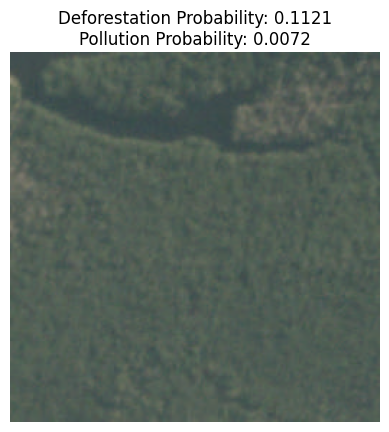

In [8]:
img_path = "amazon-satellite-images/test-jpg-additional/test-jpg-additional/file_100.jpg"
img_size=(224, 224)
img = image.load_img(img_path, target_size=img_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0
preds = loaded_model.predict(x)
print(preds)
deforestation_prob = preds[0][0]
pollution_prob = preds[0][1]
img = image.load_img(img_path)

plt.figure()
plt.imshow(img)
plt.title(f"Deforestation Probability: {deforestation_prob:.4f}\nPollution Probability: {pollution_prob:.4f}")
plt.axis("off")
plt.show()

In [10]:
from tensorflow.keras.models import load_model
import cv2
# Load the entire model
loaded_model = load_model('wildfire_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[0.00141832 0.99858165]
0.99858165 0.0014183194


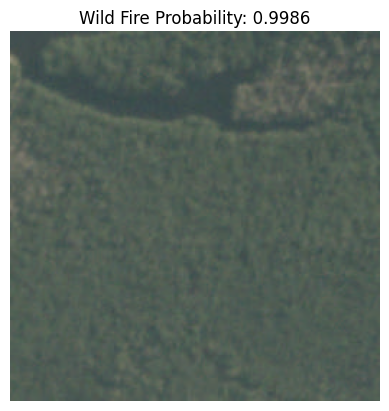

In [15]:
test_arr = []
test_img_path="wildfire-dataset/test/wildfire/-63.3175,51.3397.jpg"
test_image = cv2.imread(test_img_path)
test_image = cv2.resize(test_image,(32,32))
test_image = np.array(test_image)
test_image = test_image/255
test_image = test_image.reshape(1,32,32,3)
test_arr.append(test_image)
pred = loaded_model.predict(test_arr) 
print(pred[0])
nowildfire_prob = pred[0][0]
wildfire_prob = pred[0][1]
print(wildfire_prob, nowildfire_prob)
img = image.load_img(img_path)
if wildfire_prob> nowildfire_prob:
    plt.figure()
    plt.imshow(img)
    plt.title(f"Wild Fire Probability: {wildfire_prob:.4f}")
    plt.axis("off")
    plt.show()
else:
    plt.figure()
    plt.imshow(img)
    plt.title(f"No Wild Fire Probability: {nowildfire_prob:.4f}")
    plt.axis("off")
    plt.show()